In [158]:
import sys
import re
import pandas as pd
import numpy as np
from functools import partial
from zipfile import ZipFile
sys.path.append('../src')
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17897\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17897\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Your contact details

In [159]:
# If you're having problem importing this file, copy and paste the contents of "uatt.py" in this cell instead
# of the import statement
from uatt import submit
my_submit = partial(submit, "Avi Hazan", "IAI", "avi@coca-int.com", "0542470502")

# Prepare train data

In [160]:
def clean_content(txt):
    stemmer = WordNetLemmatizer()
    document = re.sub(r'\W', ' ', str(txt))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    
    document = document.lower()
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    document = ''.join(i for i in document if not i.isdigit())
    document = document.replace('exhibit','')
    document = document.replace('agreement','')

    return document


def find_uinque_words(txt):
    words = txt.split()
    unique = []
    for word in words:
        if word not in unique:
            unique.append(word)
            
    return unique 
 
def find_common_words(txt):
    stop_words=set(stopwords.words("english"))
    tokenized_word=word_tokenize(txt)

    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)

    fdist = FreqDist(filtered_sent)
    fdist = fdist.most_common(100)
    
    common=[]
    for item in fdist:
        common.append(item[0])
    
    return common, fdist


In [161]:
### Add unique word list and common word list and create new dataframe

data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
            
        content = z.read(fname).decode('utf8')
        content = clean_content(content)
        uniques = find_uinque_words(content)
        common, fdist = find_common_words(content)
        
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content, uniques, common))
        df_train = pd.DataFrame(data, columns=("id", "label", "content", "unique", "common"))


df_train.sample(20)




,id,label,content,unique,common
4402,01590,SPA,this stock purchase this is made effective a...,"[this, stock, purchase, is, made, effective, a...","[purchaser, shall, party, seller, section, sha..."
740,04460,employment,this employment this is made and entered ...,"[this, employment, is, made, and, entered, int...","[employee, employer, shall, term, section, ter..."
3555,31220,rsu,gray television inc long term incentive pl...,"[gray, television, inc, long, term, incentive,...","[participant, shall, date, stock, restricted, ..."
1750,14560,employment,exibit employment dated a of january betw...,"[exibit, employment, dated, a, of, january, be...","[executive, company, shall, termination, term,..."
9,39590,bylaws,of berkshire hathaway inc a amended on nove...,"[of, berkshire, hathaway, inc, a, amended, on,...","[director, shall, meeting, board, corporation,..."
2995,25620,rsu,gemstar tv guide international inc this da...,"[gemstar, tv, guide, international, inc, this,...","[optionee, corporation, option, share, shall, ..."
2279,18460,rsu,this stock option the is made and entered...,"[this, stock, option, the, is, made, and, ente...","[option, optionee, share, company, optionor, s..."
2556,21230,rsu,grant no ___ __ p _ royal gold inc omnibus lo...,"[grant, no, ___, __, p, _, royal, gold, inc, o...","[share, performance, stock, plan, company, gra..."
4210,37770,rsu,grant no royal gold inc omnibus long term ...,"[grant, no, royal, gold, inc, omnibus, long, t...","[share, performance, company, stock, plan, emp..."
161,41110,bylaws,restated of fastenal company article the na...,"[restated, of, fastenal, company, article, the...","[stock, share, corporation, shareholder, shall..."


# Plot distribution of labels


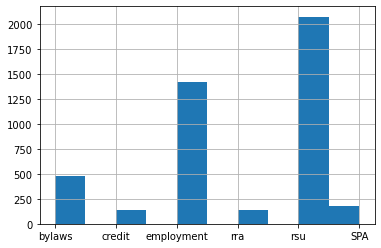

In [139]:
df_train["label"].hist()

In [140]:
# Lables list
the_lables = df_train['label'].unique()
the_lables

array(['bylaws', 'credit', 'employment', 'rra', 'rsu', 'SPA'],
      dtype=object)

In [141]:
#Get sample of bylaws common words
print(df_train.at[1,'label'], df_train.at[1,'common'])


bylaws ['shall', 'board', 'meeting', 'director', 'company', 'may', 'shareholder', 'section', 'president', 'officer', 'chairman', 'time', 'duty', 'certificate', 'notice', 'committee', 'assistant', 'person', 'secretary', 'executive', 'business', 'article', 'office', 'law', 'vice', 'day', 'employee', 'stock', 'agent', 'power', 'number', 'share', 'treasurer', 'provided', 'held', 'quorum', 'vote', 'present', 'general', 'proxy', 'entitled', 'made', 'wa', 'corporation', 'transfer', 'counsel', 'except', 'record', 'contract', 'election', 'lead', 'one', 'place', 'purpose', 'case', 'le', 'majority', 'upon', 'controller', 'without', 'elected', 'special', 'otherwise', 'prescribed', 'date', 'expense', 'action', 'holder', 'set', 'forth', 'indemnification', 'determine', 'thereof', 'name', 'book', 'management', 'annual', 'transaction', 'statute', 'absence', 'written', 'procedure', 'applicable', 'act', 'facsimile', 'member', 'delegated', 'proceeding', 'people', 'energy', 'voting', 'owned', 'principal', 

In [142]:
#See SPA unique words
df_train[df_train["label"] == 'SPA']['unique']

4244    [this, share, purchase, hereinafter, referred,...
4245    [dated, january, by, and, among, teg, oil, gas...
4246    [this, stock, purchase, is, entered, into, on,...
4247    [stock, purchase, dated, a, of, july, by, and,...
4248    [execution, version, this, stock, purchase, is...
                              ...                        
4422    [this, stock, purchase, the, is, made, and, en...
4423    [this, stock, purchase, is, made, and, entered...
4424    [this, stock, purchase, is, made, a, of, janua...
4425    [the, security, to, which, this, relates, have...
4426    [this, is, made, and, entered, into, a, of, th...
Name: unique, Length: 183, dtype: object

# Create vocabulary dataframe

In [143]:
#Create new Dataframe
# From the unique words of each document build a list of most common for each label

labels = np.array([])
commonwords = np.array([])
df_new = pd.DataFrame(columns=('labels', 'commons', "dist"))
for idx, label in enumerate(df_train['label'].unique()):
    words = (df_train[df_train["label"] == label]['unique']).to_numpy()
    words_list = np.concatenate((words), axis=None)
    common, dist = find_common_words(" ".join(words_list))
    df_new.loc[idx] = [label, common, dist]
df_new

,labels,commons,dist
0,bylaws,"[corporation, director, article, share, shall,...","[(corporation, 469), (director, 462), (article..."
1,credit,"[loan, term, party, interest, shall, date, amo...","[(loan, 131), (term, 125), (party, 124), (inte..."
2,employment,"[employment, shall, date, party, term, time, m...","[(employment, 1415), (shall, 1408), (date, 140..."
3,rra,"[right, party, may, date, term, section, compa...","[(right, 139), (party, 139), (may, 139), (date..."
4,rsu,"[date, term, may, shall, share, subject, stock...","[(date, 2069), (term, 2068), (may, 2061), (sha..."
5,SPA,"[purchase, shall, ha, share, party, term, may,...","[(purchase, 183), (shall, 182), (ha, 182), (sh..."


# Prepare test data

In [144]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')

        content = clean_content(content)
        uniques = find_uinque_words(content)
        common, dist = find_common_words(content)

        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,uniques,common))
df_test = pd.DataFrame(data, columns=("id", "content", "unique","common"))


df_test.head(10)

,id,content,unique,common
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec..."
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee..."
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ..."
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p..."
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen..."
5,ajqbd,lender party shandong longkong travel devel...,"[lender, party, shandong, longkong, travel, de...","[party, loan, shall, contract, article, right,..."
6,akjmp,pepco holding inc performance based this r...,"[pepco, holding, inc, performance, based, this...","[stock, participant, shall, award, section, un..."
7,akpvz,this employment effective a of this st da...,"[this, employment, effective, a, of, st, day, ...","[employee, company, shall, employment, termina..."
8,aktjz,the security offered hereby have not been regi...,"[the, security, offered, hereby, have, not, be...","[security, company, option, optionee, act, sha..."
9,alcuh,hei hawaiian electric industry inc with div...,"[hei, hawaiian, electric, industry, inc, with,...","[company, shall, option, section, share, emplo..."


# Rank each item in test data


In [147]:
df_test_c = df_test.copy()
df_orig_c = df_new.copy()

df_test_c['bylaws'] = '0'
df_test_c['credit'] = '0'
df_test_c['employment'] = '0'
df_test_c['rra'] = '0'
df_test_c['rsu'] = '0'
df_test_c['SPA'] = '0'

df_test_c


,id,content,unique,common,bylaws,credit,employment,rra,rsu,SPA
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec...",0,0,0,0,0,0
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee...",0,0,0,0,0,0
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ...",0,0,0,0,0,0
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p...",0,0,0,0,0,0
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
817,zvwqm,amp holding inc this nonstatutory stock opt...,"[amp, holding, inc, this, nonstatutory, stock,...","[option, share, optionee, shall, company, exer...",0,0,0,0,0,0
818,zwnhd,amended and restated this amended and restated...,"[amended, and, restated, this, employment, the...","[company, officer, shall, may, party, informat...",0,0,0,0,0,0
819,zwvfk,this made and entered into a of august b...,"[this, made, and, entered, into, a, of, august...","[executive, company, shall, employment, affili...",0,0,0,0,0,0
820,zxmpl,of mccormick company incorporated amended an...,"[of, mccormick, company, incorporated, amended...","[director, shall, board, meeting, may, stockho...",0,0,0,0,0,0


In [148]:
#Rank each file content with intersection words of uniques and commons

for index, row in df_test_c.iterrows():
    for idx, l in enumerate(the_lables):
        A1 = row['common']
        A2 = row['unique']
        B = df_orig_c['commons'].iloc[idx]
        row[l] = len(np.intersect1d(A1, B))
        
df_test_c



,id,content,unique,common,bylaws,credit,employment,rra,rsu,SPA
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec...",36,41,43,43,60,40
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee...",64,26,37,34,33,29
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ...",32,40,50,43,59,40
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p...",33,40,45,45,62,42
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen...",31,40,57,39,44,34
...,...,...,...,...,...,...,...,...,...,...
817,zvwqm,amp holding inc this nonstatutory stock opt...,"[amp, holding, inc, this, nonstatutory, stock,...","[option, share, optionee, shall, company, exer...",42,35,45,45,55,41
818,zwnhd,amended and restated this amended and restated...,"[amended, and, restated, this, employment, the...","[company, officer, shall, may, party, informat...",40,43,57,50,47,45
819,zwvfk,this made and entered into a of august b...,"[this, made, and, entered, into, a, of, august...","[executive, company, shall, employment, affili...",38,42,66,42,46,37
820,zxmpl,of mccormick company incorporated amended an...,"[of, mccormick, company, incorporated, amended...","[director, shall, board, meeting, may, stockho...",60,28,39,36,34,32


In [149]:
df_test_cs = df_test_c[['id', 'bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']]
df_test_cs

,id,bylaws,credit,employment,rra,rsu,SPA
0,acldm,36,41,43,43,60,40
1,acxlg,64,26,37,34,33,29
2,aehlr,32,40,50,43,59,40
3,aerlh,33,40,45,45,62,42
4,aisgb,31,40,57,39,44,34
...,...,...,...,...,...,...,...
817,zvwqm,42,35,45,45,55,41
818,zwnhd,40,43,57,50,47,45
819,zwvfk,38,42,66,42,46,37
820,zxmpl,60,28,39,36,34,32


# Search the heigest rank, label it and submit

In [150]:
df_test_cs['label'] = df_test_cs[['bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']].astype(float).idxmax(axis=1)
print(df_test_cs)

submission = dict(df_test_cs[["id","label"]].values)
submission_name = "Avi_H"
my_submit(submission_name, submission)


<ipython-input-150-0434d5090d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cs['label'] = df_test_cs[['bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']].astype(float).idxmax(axis=1)


        id bylaws credit employment rra rsu SPA       label
0    acldm     36     41         43  43  60  40         rsu
1    acxlg     64     26         37  34  33  29      bylaws
2    aehlr     32     40         50  43  59  40         rsu
3    aerlh     33     40         45  45  62  42         rsu
4    aisgb     31     40         57  39  44  34  employment
..     ...    ...    ...        ...  ..  ..  ..         ...
817  zvwqm     42     35         45  45  55  41         rsu
818  zwnhd     40     43         57  50  47  45  employment
819  zwvfk     38     42         66  42  46  37  employment
820  zxmpl     60     28         39  36  34  32      bylaws
821  zyfno     40     49         72  50  58  42  employment

[822 rows x 8 columns]
HTTP Error 307: Authentication Required


## Sample submission 2: Submission by string search


# See how you rank
Leaderboard is available at:
https://goren.ml/uattcontract

Accuracy of **90%** and above is required to pass the test

## Leaderboard not refreshing ?
try adding a random suffix to it, like this one:

In [110]:
import random, string
from IPython.display import HTML
rand_str = lambda: "".join(random.sample(string.ascii_letters,7))
HTML('<a href="https://goren.ml/uattcontract/?{k}={v}" target="_blank">Go to Leaderboard</a>'.format(k=rand_str(),v=rand_str()))